In [1]:
import os
import tensorflow as tf
import cProfile
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 实际的线
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

# 随机向量x
x = tf.random.normal(shape=[NUM_EXAMPLES])

# 生成噪声
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# 计算y
y = x * TRUE_W + TRUE_B + noise

In [7]:
# 模型
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # 初始化权重值为`5.0`，偏差值为`0.0`
    # 实际项目中，应该随机初始化
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

In [9]:
# 损失函数
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

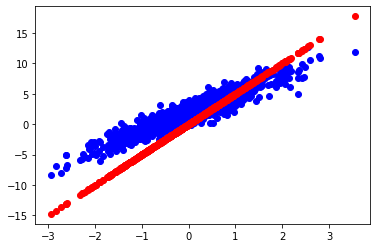

Current loss: 8.510830


In [10]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

In [11]:
# 单次训练
def train(model, x ,y, learning_rate):

    with tf.GradientTape() as t:
        current_loss = loss(y, model(x))
    dw, db = t.gradient(current_loss, [model.w, model.b])

    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

In [12]:
model = MyModel()

Ws, bs = [],[]
epochs = range(100)

# 循环训练
def training_loop(model,x,y):
    for epoch in epochs:
        train(model,x,y,learning_rate=0.1)

        Ws.append(model.w.numpy())
        bs.append(model.b.numpy())
        current_loss = loss(y,model(x))

        print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %(epoch, Ws[-1], bs[-1], current_loss))

Starting: W=5.00 b=0.00, loss=8.51083
Epoch  0: W=4.63 b=0.39, loss=5.89582
Epoch  1: W=4.32 b=0.70, loss=4.19725
Epoch  2: W=4.08 b=0.94, loss=3.09380
Epoch  3: W=3.88 b=1.14, loss=2.37684
Epoch  4: W=3.71 b=1.30, loss=1.91093
Epoch  5: W=3.58 b=1.43, loss=1.60812
Epoch  6: W=3.48 b=1.53, loss=1.41128
Epoch  7: W=3.39 b=1.61, loss=1.28331
Epoch  8: W=3.32 b=1.68, loss=1.20010
Epoch  9: W=3.26 b=1.73, loss=1.14599
Epoch 10: W=3.22 b=1.77, loss=1.11079
Epoch 11: W=3.18 b=1.81, loss=1.08790
Epoch 12: W=3.15 b=1.83, loss=1.07300
Epoch 13: W=3.12 b=1.86, loss=1.06331
Epoch 14: W=3.10 b=1.87, loss=1.05701
Epoch 15: W=3.09 b=1.89, loss=1.05290
Epoch 16: W=3.07 b=1.90, loss=1.05023
Epoch 17: W=3.06 b=1.91, loss=1.04849
Epoch 18: W=3.05 b=1.91, loss=1.04735
Epoch 19: W=3.05 b=1.92, loss=1.04662
Epoch 20: W=3.04 b=1.92, loss=1.04614
Epoch 21: W=3.04 b=1.93, loss=1.04582
Epoch 22: W=3.03 b=1.93, loss=1.04562
Epoch 23: W=3.03 b=1.93, loss=1.04549
Epoch 24: W=3.03 b=1.94, loss=1.04540
Epoch 25: W=

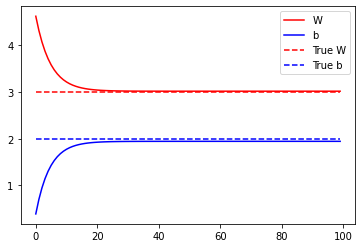

In [13]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

# 开始训练
training_loop(model, x, y)

# 绘制
plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()